FileNotFoundError: [Errno 2] No such file or directory: 'images/Ex3-n=1280.png'

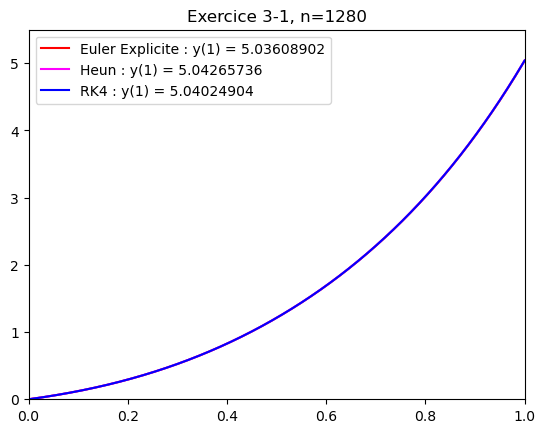

In [1]:
import numpy as np
import matplotlib.pyplot as plt



y0 = 0
n = 1280
h = 1/n


tn = [np.round(h*i,8) for i in range(int(1/h)+1)]


def f(t,y):
    e = np.math.exp(1)
    return y*(1+e**(-y)) + e**(2*t)


ye = {0:y0}
yh = {0:y0}
yrk4 = {0:y0}


for t in tn:
    ye[np.round(t+h,8)] = (np.round(f(t,ye[t])*h + ye[t],8))
    yh[np.round(t+h,8)] = (np.round((h/2)*(f(t,yh[t]) + f(t+h, yh[t] + h*f(t,yh[t]))) + yh[t],8))
    yn1 = yrk4[t] + (h/2)*f(t,yrk4[t])
    yn2 = yrk4[t] + (h/2)*f(t+h/2,yn1)
    yn3 = yrk4[t] + h*f(t+h/2,yn2)
    yrk4[np.round(t+h,8)] = (np.round((h/6)*(f(t,yrk4[t]) + 2*f(t,yn1) + 2*f(t,yn2) + f(t+h, yn3)) + yrk4[t],8))
yen = list(ye.values())
yhn = list(yh.values())
yrk4n = list(yrk4.values())
yen.pop(-1) # pour qu'elles ait la même dimension
yhn.pop(-1)
yrk4n.pop(-1)



plt.xlim((0,1))
plt.ylim((0,5.5))

plt.plot(tn,yen, color=(1,0,0), label=f"Euler Explicite : y(1) = {yen[-1]}")
plt.plot(tn,yhn, color=(1,0,1), label=f"Heun : y(1) = {yhn[-1]}")
plt.plot(tn,yrk4n, color=(0,0,1), label=f"RK4 : y(1) = {yrk4n[-1]}")

plt.legend()
plt.title(f"Exercice 3-1, n={n}")
plt.savefig(f"images/Ex3-n={n}.png", dpi=300, format="png")